# Testing `deAlmeida22` dataset

**Authorship:**
Adam Klie, *07/19/2022*
***
**Description:**
Notebook to test the working with the `deAlmeida` dataset.
***

In [1]:
import pandas as pd
import numpy as np

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic import
import eugene as eu
eu.__version__

Global seed set to 13
Global seed set to 13
Global seed set to 13


'0.0.0'

In [2]:
eu.settings.datasetdir = "../_data/datasets/"
eu.settings.datasetdir

PosixPath('/mnt/beegfs/users/aklie/projects/EUGENE/tests/_data/datasets')

In [25]:
sdata = eu.datasets.deAlmeida22(dataset="val")
sdata

Dataset deAlmeida22 Sequences_Val.fa has already been dowloaded.
Dataset deAlmeida22 Sequences_activity_Val.txt has already been dowloaded.


SeqData object with = 40570 seqs
seqs = (40570,)
names = (40570,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'Dev_log2_enrichment', 'Hk_log2_enrichment', 'Dev_log2_enrichment_scaled', 'Hk_log2_enrichment_scaled', 'Dev_log2_enrichment_quantile_normalized', 'Hk_log2_enrichment_quantile_normalized'
pos_annot: None
seqsm: None
uns: None

In [21]:

sdata

SeqData object with = 40570 seqs
seqs = (40570,)
names = (40570,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'Dev_log2_enrichment', 'Hk_log2_enrichment', 'Dev_log2_enrichment_scaled', 'Hk_log2_enrichment_scaled', 'Dev_log2_enrichment_quantile_normalized', 'Hk_log2_enrichment_quantile_normalized'
pos_annot: None
seqsm: None
uns: None

In [8]:
import os

In [9]:
os.path.exists("/mnt/beegfs/users/aklie/projects/EUGENE/tests/_data/datasets/deAlmeida22/Sequences_Train.csv")

False

In [ ]:
s

In [20]:
sdata["set"].value_counts()

train    65004
test      7154
Name: set, dtype: int64

In [14]:
sdata.seqs_annot["set"].value_counts()

train    133217
test      14748
Name: set, dtype: int64

In [21]:
sdata.seqs_annot

,set,sp,gene,enrichment
seq00000,test,At,AT5G03425,-0.537451
seq00001,test,Sb,ENSRNA049996419,4.108127
seq00002,test,Zm,ENSRNA049997541,-0.718419
seq00003,test,Sb,ENSRNA049996013,1.340581
seq00004,test,At,AT4G04125,4.227307
...,...,...,...,...
seq72153,train,Zm,Zm00001d013406,-1.274929
seq72154,train,Zm,Zm00001d049906,-0.190040
seq72155,train,Sb,SORBI_3004G044100,-0.954699
seq72156,train,Sb,SORBI_3004G252700,0.337022


In [22]:
eu.pp.prepare_data(sdata)

  0%|          | 0/3 [00:00<?, ?it/s]

reverse_complement
one_hot_encode
train_test_split
SeqData object modified:
	rev_seqs: None -> 72158 rev_seqs added
	ohe_seqs: None -> 72158 ohe_seqs added
	ohe_rev_seqs: None -> 72158 ohe_rev_seqs added
    seqs_annot:
        + TRAIN


In [23]:
eu.pp.scale_targets(sdata, target_col="enrichment")

SeqData object modified:
    seqs_annot:
        + enrichment_SCALED


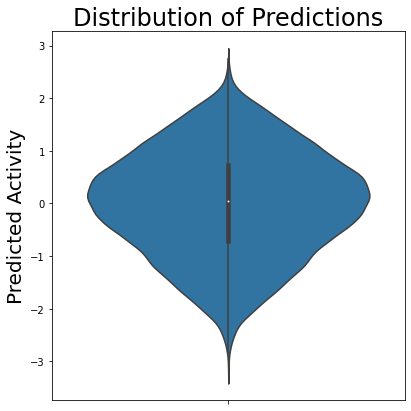

In [24]:
eu.pl.violin(sdata, value="enrichment_SCALED")

In [25]:
sdata

SeqData object with = 72158 seqs
seqs = (72158,)
names = (72158,)
rev_seqs = (72158,)
ohe_seqs = (72158, 170, 4)
ohe_rev_seqs = (72158, 170, 4)
seqs_annot: 'set', 'sp', 'gene', 'enrichment', 'TRAIN', 'enrichment_SCALED'
pos_annot: None
seqsm: None
uns: None

In [28]:
model = eu.models.DeepBind(input_len=170, output_dim=1)

In [29]:
eu.train.fit(model, sdata=sdata, target_label="enrichment_SCALED", epochs=1, log_dir="../_logs", out_dir="../_out/jores21")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type                      | Params
--------------------------------------------------------
0 | r_squared | R2Score                   | 0     
1 | max_pool  | MaxPool1d                 | 0     
2 | avg_pool  | AvgPool1d                 | 0     
3 | convnet   | BasicConv1D               | 272   
4 | fcn       | BasicFullyConnectedModule | 359 K 
--------------------------------------------------------
360 K     Trainable params
0         Non-trainable params
360 K     Total params
1.440     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + PREDICTIONS


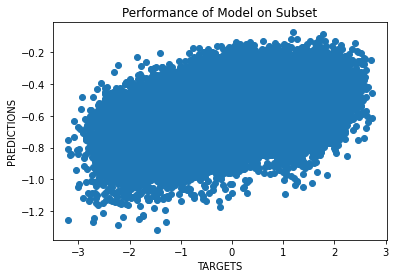

In [32]:
eu.pl.performance_scatter(sdata, target="enrichment_SCALED")

In [30]:
sdata.seqs_annot

,set,sp,gene,enrichment,TRAIN,enrichment_SCALED,PREDICTIONS
seq00000,test,At,AT5G03425,-0.537451,True,-0.864320,-0.507624
seq00001,test,Sb,ENSRNA049996419,4.108127,True,1.922392,-0.769259
seq00002,test,Zm,ENSRNA049997541,-0.718419,False,-0.972876,-0.729843
seq00003,test,Sb,ENSRNA049996013,1.340581,False,0.262242,-0.684897
seq00004,test,At,AT4G04125,4.227307,True,1.993883,-0.318295
...,...,...,...,...,...,...,...
seq72153,train,Zm,Zm00001d013406,-1.274929,False,-1.306706,-1.006838
seq72154,train,Zm,Zm00001d049906,-0.190040,True,-0.655921,-0.888485
seq72155,train,Sb,SORBI_3004G044100,-0.954699,True,-1.114611,-0.688373
seq72156,train,Sb,SORBI_3004G252700,0.337022,True,-0.339756,-1.021375


---

# Scratch

In [6]:
from eugene.datasets._utils import try_download_urls

In [13]:
urls_list = ["https://zenodo.org/record/6863861/files/farley2015_seqs.csv?download=1",
"https://zenodo.org/record/6863861/files/farley2015_seqs_annot.csv?download=1"]
paths = try_download_urls([0,1], urls_list, "farley15", compression = "") 

Dataset farley15 farley2015_seqs.csv has already been dowloaded.
Dataset farley15 farley2015_seqs_annot.csv has already been dowloaded.


In [14]:
path = paths[0]

In [ ]:
eu.dl.read_csv(path, sep=",", seq_col=seq_col, target_col=target_col, col_names=[seq_col,target_col], auto_name=True, compression="")